Dataset
In this homework, we will use the California Housing Prices from Kaggle.

Here's a wget-able link:

wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

EDA
Load the data.
Look at the median_house_value variable. Does it have a long tail?

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('C:\\Users\\x230252\\Documents\\Rodolfo\\Pyhton Project\\ML Zoomcamp\\chapter1\\housing.csv')

In [3]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [11]:
df.median_house_value.value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: median_house_value, Length: 3842, dtype: int64

### Exploratory data analysis

In [4]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

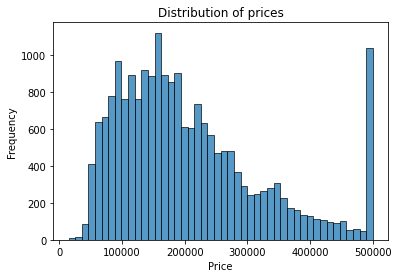

In [13]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value)
# , bins=40, color='black', alpha=1
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

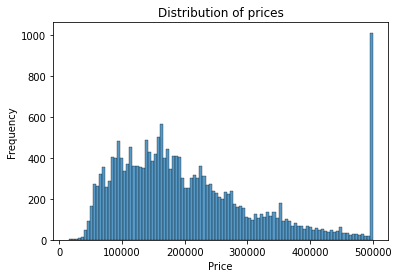

In [12]:
plt.figure(figsize=(6, 4))

sns.histplot(df.median_house_value, bins=100)
# , bins=40, color='black', alpha=1
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

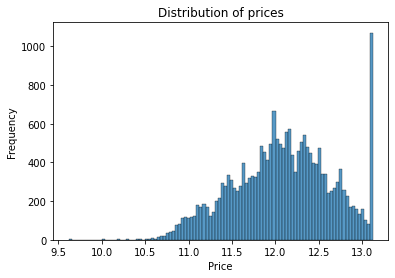

In [15]:
log_price = np.log1p(df.median_house_value)

sns.histplot(log_price, bins=100)
# , bins=40, color='black', alpha=1
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

### Preparing the dataset
For this homework, we only want to use a subset of data.

First, keep only the records where ocean_proximity is either '<1H OCEAN' or 'INLAND'

Next, use only the following columns:

'latitude',
'longitude',
'housing_median_age',
'total_rooms',
'total_bedrooms',
'population',
'households',
'median_income',
'median_house_value'

In [19]:
df_new = df[['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']][(df['ocean_proximity'] == '<1H OCEAN') | (df['ocean_proximity'] == 'INLAND')]
df_new 

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0
...,...,...,...,...,...,...,...,...,...
20635,39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,39.43,-121.32,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


Question 1 \
There's one feature with missing values. What is it?

In [21]:
df_new.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

Question 2 \
What's the median (50% percentile) for variable 'population'?

In [26]:
df_new.population.describe()

count    15687.000000
mean      1466.317205
std       1180.389908
min          3.000000
25%        802.000000
50%       1195.000000
75%       1777.000000
max      35682.000000
Name: population, dtype: float64

Prepare and split the dataset \
Shuffle the dataset (the filtered one you created above), use seed 42. \
Split your data in train/val/test sets, with 60%/20%/20% distribution. \
Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [83]:
np.random.seed(42)

n = len(df_new)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_new.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [84]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

Question 3

We need to deal with missing values for the column from Q1. \
We have two options: fill it with 0 or with the mean of this variable.\
Try both options. For each, train a linear regression model without regularization using the code from the lessons.\
For computing the mean, use the training only!\
Use the validation dataset to evaluate the models and compare the RMSE of each option.\
Round the RMSE scores to 2 decimal digits using round(score, 2)\
Which option gives better RMSE?

In [86]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9413 entries, 19963 to 5498
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            9413 non-null   float64
 1   longitude           9413 non-null   float64
 2   housing_median_age  9413 non-null   float64
 3   total_rooms         9413 non-null   float64
 4   total_bedrooms      9319 non-null   float64
 5   population          9413 non-null   float64
 6   households          9413 non-null   float64
 7   median_income       9413 non-null   float64
dtypes: float64(8)
memory usage: 661.9 KB


In [32]:
#df_train_zeros = df_train.fillna(0) #filling train df with zeros

In [69]:
# df_train_means = df_train.copy()
# df_train_means['total_bedrooms'].fillna(df_train_means["total_bedrooms"].mean(), inplace=True)
# df_train_means.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9413 entries, 19963 to 5498
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            9413 non-null   float64
 1   longitude           9413 non-null   float64
 2   housing_median_age  9413 non-null   float64
 3   total_rooms         9413 non-null   float64
 4   total_bedrooms      9413 non-null   float64
 5   population          9413 non-null   float64
 6   households          9413 non-null   float64
 7   median_income       9413 non-null   float64
dtypes: float64(8)
memory usage: 661.9 KB


In [35]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

Option with 0:

In [85]:
def prepare_X_zeros(df):
    df_num = df.fillna(0)
    X = df_num.values
    return X

In [38]:
X_train_zeros = prepare_X_zeros(df_train)
w_0, w = train_linear_regression(X_train_zeros, y_train)

In [41]:
y_pred_zeros = w_0 + X_train_zeros.dot(w)

RMSE

In [40]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

RMSE for 0 filled in Train Dataset

In [78]:
round(rmse(y_train, y_pred_zeros),2) # For Train Dataset

0.34

In [79]:
X_val_zeros = prepare_X_zeros(df_val)
w_0, w = train_linear_regression(X_val_zeros, y_val)
y_val_pred_zeros = w_0 + X_val_zeros.dot(w)

In [80]:
round(rmse(y_val, y_val_pred_zeros),2)

0.34

Option for mean filled nulls:

In [64]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9413 entries, 19963 to 5498
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            9413 non-null   float64
 1   longitude           9413 non-null   float64
 2   housing_median_age  9413 non-null   float64
 3   total_rooms         9413 non-null   float64
 4   total_bedrooms      9319 non-null   float64
 5   population          9413 non-null   float64
 6   households          9413 non-null   float64
 7   median_income       9413 non-null   float64
dtypes: float64(8)
memory usage: 661.9 KB


In [71]:
def prepare_X_mean(df):
    df_num = df.copy()
    df_num['total_bedrooms'].fillna(df["total_bedrooms"].mean(), inplace=True)
    X = df_num.values
    return X

In [72]:
X_train_mean = prepare_X_mean(df_train)
w_0, w = train_linear_regression(X_train_mean, y_train)
y_train_pred_mean = w_0 + X_train_mean.dot(w)

In [76]:
round(rmse(y_train, y_train_pred_mean),2)

0.34

In [74]:
X_val_mean = prepare_X_mean(df_val)
w_0, w = train_linear_regression(X_val_mean, y_val)
y_val_pred_mean = w_0 + X_val_mean.dot(w)

In [77]:
round(rmse(y_val, y_val_pred_mean),2)

0.34

Both are equaly good with 0.34

Question 4

Now let's train a regularized linear regression.\
For this question, fill the NAs with 0.\
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].\
Use RMSE to evaluate the model on the validation dataset.\
Round the RMSE scores to 2 decimal digits.\
Which r gives the best RMSE?

In [81]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [87]:
X_train_zeros = prepare_X_zeros(df_train)

In [92]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train_zeros, y_train, r=r)
    y_pred_zeros = w_0 + X_train_zeros.dot(w)
    score = rmse(y_train,y_pred_zeros)
    print('%5s, %.6f, %.8f' % (r, w_0, score))

    0, -9.763249, 0.34027197
1e-06, -9.763229, 0.34027197
0.0001, -9.761185, 0.34027197
0.001, -9.742646, 0.34027200
 0.01, -9.561056, 0.34027499
  0.1, -8.058890, 0.34048644
    1, -3.133154, 0.34350314
    5, -0.841087, 0.34610124
   10, -0.438117, 0.34663477


Question 5

We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.\
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].\
For each seed, do the train/validation/test split with 60%/20%/20% distribution.\
Fill the missing values with 0 and train a model without regularization.\
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.\
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.\
Round the result to 3 decimal digits (round(std, 3))\
What's the value of std?

In [96]:
def split_shuffle(s):
    np.random.seed(s)

    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df_new.iloc[idx]
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    return df_train, df_val, df_test, y_train, y_val, y_test

In [97]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [111]:
rmse_list = []
for s in seeds:
    df_train, df_val, df_test, y_train, y_val, y_test = split_shuffle(s)

    X_train_zeros = prepare_X_zeros(df_train)
    w_0, w = train_linear_regression(X_train_zeros, y_train)
    y_pred_zeros = w_0 + X_train_zeros.dot(w)

    X_val_zeros = prepare_X_zeros(df_val)
    y_val_pred_zeros = w_0 + X_val_zeros.dot(w)


    score = np.round(rmse(y_train,y_pred_zeros),2)

    rmse_list.append(score)
    print('For seed: %s, w0:%f, score: %.2f' % (s, w_0, score))
    

For seed: 0, w0:-9.870069, score: 0.33
For seed: 1, w0:-9.114011, score: 0.34
For seed: 2, w0:-9.911560, score: 0.34
For seed: 3, w0:-10.233184, score: 0.34
For seed: 4, w0:-9.174763, score: 0.33
For seed: 5, w0:-10.006648, score: 0.34
For seed: 6, w0:-10.039903, score: 0.34
For seed: 7, w0:-10.353545, score: 0.33
For seed: 8, w0:-9.899416, score: 0.33
For seed: 9, w0:-9.964622, score: 0.34


In [112]:
np.round(np.std(rmse_list),3)

0.005

Question 6

Split the dataset like previously, use seed 9.\
Combine train and validation datasets.\
Fill the missing values with 0 and train a model with r=0.001.\
What's the RMSE on the test dataset?

In [114]:
np.random.seed(9)

n = len(df_new)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df_new.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

df_train_new = pd.concat([df_train,df_val])
df_train_new = df_train_new.reset_index(drop=True)

df_test = df_test.reset_index(drop=True)

y_train_new_orig = df_train_new.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train_new = np.log1p(y_train_new_orig)
y_test = np.log1p(y_test_orig)

del df_train_new['median_house_value']
del df_test['median_house_value']

In [115]:
X_train_zeros = prepare_X_zeros(df_train_new)
w_0, w = train_linear_regression_reg(X_train_zeros, y_train_new, r=0.001)
y_pred_zeros = w_0 + X_train_zeros.dot(w)

X_test_zeros = prepare_X_zeros(df_test)
y_test_pred_zeros = w_0 + X_test_zeros.dot(w)

np.round(rmse(y_test,y_test_pred_zeros),2)

0.33